In [1]:
import numpy as np
import h5py
import scipy.io

In [2]:
# Load training and noisy test data
def load_dataset(idx, N):
    if idx==0:
        filepath = "/Users/cf/Dropbox/research/SonarLaptop/dataForPaper/twoLayer_train_N=80000.mat"
        f1 = h5py.File(filepath, mode='r')
    else:
        filepath = "/Users/cf/Dropbox/research/SonarLaptop/dataForPaper/Test Data/twoLayer_test_case"+ str(idx) +"_SNR_20.mat"
        f1 = h5py.File(filepath, mode='r')
       
    bs_2 = {}
   
    for k, v in f1.items():
        bs_2[k] = np.array(v)
    labels = bs_2['parameters'][6,:].transpose() if idx==0 else bs_2['parameters']
 
    ind = np.random.permutation(len(labels))
    Nd = np.amin([N,len(labels)])
    ind = ind[0:Nd]
   
    labels = labels[ind]
    labels = labels.reshape((Nd, 1))
    Y = labels.transpose()
    classes = np.unique(labels)
    for ck in range(len(classes)):
        Y = np.where(Y==classes[ck], ck, Y)

    y = np.array(Y[0], dtype=int)
    X = bs_2['signal'][:,ind].transpose()
   

    #making sure the labels are correct
    y=labels
    for i in range(N):
        if abs(labels[i]-1500)<20:
            y[i]=1500
        else:
            if abs(labels[i]-1575)<20:
                y[i]=1575
            else:
                if abs(labels[i]-1650)<20:
                    y[i]=1650
                else:
                    if abs(labels[i]-1800)<20:
                        y[i]=1800

    return X, y


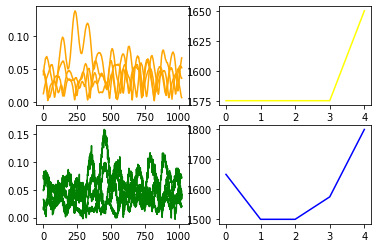

In [4]:
# Plot the training and test data and labels
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm


X_train, y_train = load_dataset(0, 5)
X_test, y_test = load_dataset(4,5)
f, ax = plt.subplots(2, 2, sharey=False, sharex=False)
ax[0][0].plot(X_train[1:5,:].transpose(), color='orange')
ax[0][1].plot(y_train, color='yellow')
ax[1][0].plot(X_test[1:5,:].transpose(), color='green')
ax[1][1].plot(y_test, color='blue')

In [5]:
from time import time
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Benchmark metrics for each classifier
# Adapted from Peter Prettenhofer, et. al,
# https://scikit-learn.org/0.19/auto_examples/text/document_classification_20newsgroups.html
def benchmark(clf):
    score = [[] for x in range(5)]
    
    target_names=[]
    targets=np.unique(y_train);
    
    for i in range(len(targets)):
        target_names.append(np.str(targets[i]))
    print('_' * 80)
    print("Training: ")
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
        
    t0 = time()
    print("Validation: ")
    pred=clf.predict(X_val)
    
    print(metrics.confusion_matrix(y_val, pred))
    print(metrics.classification_report(y_val, pred, target_names=target_names))
    score[0] = [metrics.accuracy_score(y_val, pred)]
    print("val score:   %0.3f" % score[0][0])
    
    print("Test1: ")
    t0 = time()
    pred = clf.predict(X_test1)
    test_time = time() - t0
    score[1] = [metrics.accuracy_score(y_test1, pred)]
    
    print("test time:  %0.3fs" % test_time)
    print("accuracy:   %0.3f" % score[1][0])
    #print("classification report:")
    #print(metrics.classification_report(y_test, pred, target_names=target_names))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test1, pred))
    
    
    print("Test2: ")
    t0 = time()
    pred = clf.predict(X_test2)
    test_time = time() - t0
    score[2] = [metrics.accuracy_score(y_test2, pred)]
    
    print("test time:  %0.3fs" % test_time)
    print("accuracy:   %0.3f" % score[2][0])
    #print("classification report:")
    #print(metrics.classification_report(y_test, pred, target_names=target_names))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test2, pred))
    print("Test3: ")
    t0 = time()
    pred = clf.predict(X_test3)
    test_time = time() - t0
    score[3] = [metrics.accuracy_score(y_test3, pred)]
    
    print("test time:  %0.3fs" % test_time)
    print("accuracy:   %0.3f" % score[3][0])
    #print("classification report:")
    #print(metrics.classification_report(y_test3, pred, target_names=target_names))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test3, pred))
    
    print("Test4: ")
    t0 = time()
    pred = clf.predict(X_test4)
    test_time = time() - t0
    score[4] = [metrics.accuracy_score(y_test4, pred)]
    
    print("test time:  %0.3fs" % test_time)
    print("accuracy:   %0.3f" % score[4][0])
    #print("classification report:")
    #print(metrics.classification_report(y_test, pred, target_names=target_names))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test4, pred))
  
    
    clf_descr = str(str(clf.estimator))
    clf_rep = str(metrics.classification_report(y_test4, pred, target_names=target_names))
    clf_cm = str(metrics.confusion_matrix(y_test4, pred))
    return clf_descr, score, train_time, test_time, clf_rep, clf_cm
      
      

In [10]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, expon
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# list of (estimator, param_dist), where param_dist is used  in RandomizedSearchCV
classifiers = [
     (KNeighborsClassifier(), {
         'n_neighbors': sp_randint(8, 10),
         'weights': ['uniform', 'distance'],
         'algorithm':['ball_tree', 'kd_tree'],
     }),
    (NearestCentroid(), {
         'metric': ['euclidean', 'manhattan','minkowski','chebyshev'],
         'shrink_threshold': [None, .001, .0001, .1, .01]
     }),
    (SVC(kernel='linear'), {
        'C': np.logspace(-1, 3, 100),
        'tol': np.logspace(-8, -2, 100)
    }),
    (SVC(random_state=42, gamma='scale'), {
        'C': [.1, 1, 10, 100, 1000],
        'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 
        'class_weight':['balanced', None],
        'tol': np.logspace(-8, -2, 100)
    }),
    (MLPClassifier(max_iter=100000), {
        'hidden_layer_sizes': [(200), (50), (100,)],
        'alpha': expon(scale=.1),
        'learning_rate': ['constant','adaptive'],
    }),
    (DecisionTreeClassifier(),{
        'criterion': ['gini', 'entropy'],
        'splitter': ['best','random'],
        'max_features':[None, 'auto', 'sqrt', 'log2'],
    }),
    (RandomForestClassifier(max_depth=5, n_jobs=-1), {
        "max_depth": sp_randint(2, 20),
        "n_estimators": sp_randint(2, 50),
        "max_features": ['auto', 'log2'],
        'class_weight': ['balanced', 'balanced_subsample'],
        'criterion': ['gini', 'entropy']
    }),
     (LogisticRegression(solver='newton-cg', random_state=0, max_iter=100000), {
        'C': [.1, 1, 10, 100, 1000],
         'multi_class': ["auto", "ovr","multinomial"],
         'solver': ['sag', 'saga', 'newton-cg'],
         'tol': np.logspace(-6, -4, 100)
     }),
]
names = [e.__class__.__name__ for e, g in classifiers]

In [8]:
from sklearn.model_selection import train_test_split
# Load training and test data
X,y=load_dataset(0, 5000)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
X_test1, y_test1= load_dataset(1, 20000)
X_test2, y_test2= load_dataset(2, 20000)
X_test3, y_test3= load_dataset(3, 20000)
X_test4, y_test4= load_dataset(4, 20000)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import RandomizedSearchCV

datasets = [X_train,y_train]
data_name=['BS 2 layer']

grid_searches = dict()
results = [[] for x in range(1)]


# iterate over datasets

    
print('\n Dataset:', data_name,'\n')

X = X_train
y = y_train
# iterate over classifiers
for est_idx, (name, (estimator, param_grid)) in \
        enumerate(zip(names, classifiers)):
    print(name)

    # Perform randomized grid search over possible hyperparameters
    clf = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=20, cv=5,
                       iid='true', verbose=0, n_jobs=-1)

    with ignore_warnings(category=ConvergenceWarning):
        results.append(benchmark(clf))


    # Store the classifier
    grid_searches[name] = clf
       
    


 Dataset: ['BS 2 layer'] 

KNeighborsClassifier
________________________________________________________________________________
Training: 


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


train time: 34.034s
Validation: 
[[236   3   0   0]
 [ 97 144  16   2]
 [ 94  82  59   6]
 [ 63  12  49 137]]
              precision    recall  f1-score   support

      1500.0       0.48      0.99      0.65       239
      1575.0       0.60      0.56      0.58       259
      1650.0       0.48      0.24      0.32       241
      1800.0       0.94      0.52      0.67       261

    accuracy                           0.58      1000
   macro avg       0.62      0.58      0.56      1000
weighted avg       0.63      0.58      0.56      1000

val score:   0.576
Test1: 
test time:  130.709s
accuracy:   0.595
confusion matrix:
[[4811   57    0    0]
 [1767 2742  302   29]
 [1894 1536 1316  314]
 [1316  126  766 3024]]
Test2: 
test time:  130.995s
accuracy:   0.572
confusion matrix:
[[4755   64    1    0]
 [1860 2785  324   23]
 [2110 1685 1145  236]
 [1325  162  766 2759]]
Test3: 
test time:  128.363s
accuracy:   0.459
confusion matrix:
[[4397  293   43   83]
 [2153 2278  374  183]
 [2051 17

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 2.707s
Validation: 
[[181   4  45   9]
 [ 49 125  78   7]
 [  4  46 156  35]
 [  0   1  55 205]]
              precision    recall  f1-score   support

      1500.0       0.77      0.76      0.77       239
      1575.0       0.71      0.48      0.57       259
      1650.0       0.47      0.65      0.54       241
      1800.0       0.80      0.79      0.79       261

    accuracy                           0.67      1000
   macro avg       0.69      0.67      0.67      1000
weighted avg       0.69      0.67      0.67      1000

val score:   0.667
Test1: 
test time:  0.105s
accuracy:   0.669
confusion matrix:
[[3597  112  946  213]
 [ 999 2211 1483  147]
 [  61  833 3222  944]
 [   0   15  873 4344]]
Test2: 
test time:  0.107s
accuracy:   0.649
confusion matrix:
[[3382  110 1162  166]
 [1063 2229 1577  123]
 [  92  946 3263  875]
 [   0   13  899 4100]]
Test3: 
test time:  0.103s
accuracy:   0.533
confusion matrix:
[[2290  142 1047 1337]
 [ 795 2082  784 1327]
 [  13  901 3458

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 151.167s
Validation: 
[[222  11   1   5]
 [ 61 135  57   6]
 [ 18  38 151  34]
 [  2   4  34 221]]
              precision    recall  f1-score   support

      1500.0       0.73      0.93      0.82       239
      1575.0       0.72      0.52      0.60       259
      1650.0       0.62      0.63      0.62       241
      1800.0       0.83      0.85      0.84       261

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.72      1000
weighted avg       0.73      0.73      0.72      1000

val score:   0.729
Test1: 
test time:  56.848s
accuracy:   0.593
confusion matrix:
[[3643  826  268  131]
 [1628 2030 1006  176]
 [ 776  995 2316  973]
 [ 248  133  982 3869]]
Test2: 
test time:  57.031s
accuracy:   0.579
confusion matrix:
[[3519  851  329  121]
 [1676 2029 1105  182]
 [ 819 1158 2352  847]
 [ 216  132  994 3670]]
Test3: 
test time:  56.872s
accuracy:   0.428
confusion matrix:
[[2406  889  539  982]
 [1571 1627  910  880]
 [1050 1242

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 129.316s
Validation: 
[[229  10   0   0]
 [ 10 183  61   5]
 [  3  47 162  29]
 [  0   2  42 217]]
              precision    recall  f1-score   support

      1500.0       0.95      0.96      0.95       239
      1575.0       0.76      0.71      0.73       259
      1650.0       0.61      0.67      0.64       241
      1800.0       0.86      0.83      0.85       261

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

val score:   0.791
Test1: 
test time:  53.073s
accuracy:   0.769
confusion matrix:
[[4348  431   37   52]
 [ 156 3267 1296  121]
 [   2  835 3184 1039]
 [   4   19  628 4581]]
Test2: 
test time:  53.230s
accuracy:   0.764
confusion matrix:
[[4358  368   69   25]
 [ 146 3301 1403  142]
 [  14  953 3284  925]
 [  12   16  638 4346]]
Test3: 
test time:  53.062s
accuracy:   0.578
confusion matrix:
[[2610  845  420  941]
 [ 489 2552  827 1120]
 [   0 1024

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 357.695s
Validation: 
[[190   9  29  11]
 [ 15 183  53   8]
 [ 11  51 127  52]
 [  2   3  29 227]]
              precision    recall  f1-score   support

      1500.0       0.87      0.79      0.83       239
      1575.0       0.74      0.71      0.72       259
      1650.0       0.53      0.53      0.53       241
      1800.0       0.76      0.87      0.81       261

    accuracy                           0.73      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.73      0.73      1000

val score:   0.727
Test1: 
test time:  0.046s
accuracy:   0.704
confusion matrix:
[[3525  469  578  296]
 [ 219 3294 1128  199]
 [ 115 1055 2527 1363]
 [  39   27  432 4734]]
Test2: 
test time:  0.040s
accuracy:   0.696
confusion matrix:
[[3536  381  712  191]
 [ 244 3304 1237  207]
 [ 103 1257 2560 1256]
 [  39   37  413 4523]]
Test3: 
test time:  0.040s
accuracy:   0.532
confusion matrix:
[[2221  806  461 1328]
 [ 339 2638  694 1317]
 [ 296 1277 24

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


train time: 5.170s
Validation: 
[[169  42  21   7]
 [ 53 119  74  13]
 [ 28  57 103  53]
 [  6  12  53 190]]
              precision    recall  f1-score   support

      1500.0       0.66      0.71      0.68       239
      1575.0       0.52      0.46      0.49       259
      1650.0       0.41      0.43      0.42       241
      1800.0       0.72      0.73      0.73       261

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.58      0.58      0.58      1000

val score:   0.581
Test1: 
test time:  0.077s
accuracy:   0.561
confusion matrix:
[[3431  851  421  165]
 [ 799 2221 1398  422]
 [ 471 1269 1897 1423]
 [ 210  294 1054 3674]]
Test2: 
test time:  0.053s
accuracy:   0.551
confusion matrix:
[[3204  934  505  177]
 [ 903 2271 1420  398]
 [ 502 1411 1972 1291]
 [ 189  246 1009 3568]]
Test3: 
test time:  0.054s
accuracy:   0.441
confusion matrix:
[[2510  729  646  931]
 [ 841 1769 1313 1065]
 [ 493 1341 1986

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


train time: 6.333s
Validation: 
[[196  20  20   3]
 [  9 184  58   8]
 [  2  54 142  43]
 [  1   4  34 222]]
              precision    recall  f1-score   support

      1500.0       0.94      0.82      0.88       239
      1575.0       0.70      0.71      0.71       259
      1650.0       0.56      0.59      0.57       241
      1800.0       0.80      0.85      0.83       261

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.75      0.74      0.75      1000

val score:   0.744
Test1: 
test time:  0.158s
accuracy:   0.724
confusion matrix:
[[3791  515  426  136]
 [ 178 3236 1233  193]
 [  25  947 2882 1206]
 [   4   28  624 4576]]
Test2: 
test time:  0.150s
accuracy:   0.711
confusion matrix:
[[3759  456  505  100]
 [ 191 3265 1319  217]
 [  14 1222 2827 1113]
 [   2   33  607 4370]]
Test3: 
test time:  0.151s
accuracy:   0.540
confusion matrix:
[[2250  803  464 1299]
 [ 310 2496  858 1324]
 [  24 1169 2909

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train time: 2050.645s
Validation: 
[[207  21   2   9]
 [ 66 134  56   3]
 [ 15  38 161  27]
 [  1   3  47 210]]
              precision    recall  f1-score   support

      1500.0       0.72      0.87      0.78       239
      1575.0       0.68      0.52      0.59       259
      1650.0       0.61      0.67      0.64       241
      1800.0       0.84      0.80      0.82       261

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000

val score:   0.712
Test1: 
test time:  0.020s
accuracy:   0.571
confusion matrix:
[[3283 1050  309  226]
 [1540 1853 1250  197]
 [ 609 1079 2396  976]
 [  72  190 1079 3891]]
Test2: 
test time:  0.019s
accuracy:   0.554
confusion matrix:
[[3189 1067  368  196]
 [1583 1799 1403  207]
 [ 651 1188 2451  886]
 [  72  184 1113 3643]]
Test3: 
test time:  0.019s
accuracy:   0.417
confusion matrix:
[[2188  962  601 1065]
 [1315 1537 1111 1025]
 [ 809 1328 2

In [ ]:
from sklearn.metrics import confusion_matrix
# iterate over datasets
for ds_cnt, (X, y) in enumerate(dsets):
    for est_idx, (name, (estimator, param_grid)) in \
            enumerate(zip(names, classifiers)):
        clf=grid_searches[ds_cnt][name]
        clf.fit(X_train, y_train)
    
        score = [clf.score(X_test, y_test), clf.score(X_test1, y_test1), clf.score(X_test2, y_test2), clf.score(X_test3, y_test3),clf.score(X_test4, y_test4)]  
        print(name)
        print(score)
    
        conf = confusion_matrix(y_test1, clf.predict(X_test1))
        print(conf)

In [ ]:
# To put into a LaTex table
import datetime
import time
for nc in range(10):
    clf_descr, score, train_time, test_time, clf_rep, clf_cm=results[0][nc]

    print(names[nc]+"&"+str(datetime.timedelta(seconds=np.round(train_time)))+"&"+str(np.round(score[0][0]*100,decimals=2))+"&"
                           + str(np.round(score[1][0]*100,decimals=2))+"&"
                           + str(np.round(score[2][0]*100,decimals=2))+"&"
                           + str(np.round(score[3][0]*100,decimals=2))+"&"
                           + str(np.round(score[4][0]*100,decimals=2))+"\\"+"\\")
          


In [ ]:
import pandas as pd
def score_summary(grid_searches, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [ ]:
df=score_summary(grid_searches[0])
df